# 🚀 Real-Time Face Detection & Tracking with Deep Learning

This project implements a custom face detection and tracking system using **TensorFlow/Keras** and **OpenCV**. We use a **VGG16** backbone with functional heads for classification (is there a face?) and regression (where is the face bounding box?).

## 🛠 Key Components:
1. **Data Collection**: Capture raw images using OpenCV.
2. **Annotation**: Using LabelMe for bounding box labeling.
3. **Augmentation**: albumentations for synthetic data generation.
4. **Model Architecture**: V6G16 Transfer Learning for Feature Extraction.
5. **Custom Loss**: Localization Loss combine with Binary Crossentropy.
6. **Real-Time Detection**: Live webcam feed with dynamic bounding boxes.

# 1. Setup and Get Data

### 1.1 Install Dependencies and Setup

In [21]:
# Install necessary libraries for image processing, deep learning, and data augmentation
%pip install labelme opencv-python matplotlib albumentations split-folders


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'split-folders\\n': Expected end or semicolon (after name and no valid version specifier)
    split-folders\n
                 ^
Hint: It looks like a path. File 'split-folders\n' does not exist.


In [22]:
# Install necessary libraries for image processing, deep learning, and data augmentation
%pip install labelme opencv-python matplotlib albumentations split-folders


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'split-folders\\n': Expected end or semicolon (after name and no valid version specifier)
    split-folders\n
                 ^
Hint: It looks like a path. File 'split-folders\n' does not exist.


In [23]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.20.0
[]


In [24]:
!conda install -c conda-forge cudatoolkit=12.1 cudnn=8.9 -y

3 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: failed



PackagesNotFoundError: The following packages are not available from current channels:

  - cudatoolkit=12.1

Current channels:

  - https://conda.anaconda.org/conda-forge
  - defaults

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [25]:
!conda activate base

In [28]:
import os, platform, glob

print("DO NOT RUN CU DNN COPY FROM PYTHON IN A NOTEBOOK UNLESS YOU KNOW WHAT YOU'RE DOING.")
print("Run these steps in a Windows shell (PowerShell or CMD). Example PowerShell commands:")
print(r'  Copy-Item "path\to\cudnn\bin\cudnn*.dll" "C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.1\bin"')
print(r'  Copy-Item "path\to\cudnn\include\cudnn*.h" "C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.1\include"')
print(r'  Copy-Item "path\to\cudnn\lib\x64\cudnn*.lib" "C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.1\lib\x64"')
print()
print("If you really want Python examples (run in a script, with correct source paths and admin rights), use shutil.copy:")
print(r'  import shutil')
print(r'  shutil.copy(r"source\bin\cudnn64_8.dll", r"C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.1\bin\cudnn64_8.dll")')
print()

# Optional checks to help you prepare commands (no files will be copied)
if platform.system() == "Windows":
    cuda_default = r"C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.1"
    print("Detected Windows. Typical CUDA path:", cuda_default)
    for sub in ("bin", "include", os.path.join("lib","x64")):
        p = os.path.join(cuda_default, sub)
        print("  - target dir exists?" , p, os.path.exists(p))
else:
    print("Not Windows. Stop here and run the copy commands on the Windows machine where CUDA is installed.")

# List any local cudnn files (so you can craft source paths)
local_cudnn = glob.glob("**/cudnn*.*", recursive=True)
if local_cudnn:
    print("\nLocal cudnn-related files found (use these as source paths):")
    for f in local_cudnn:
        print(" ", f)
else:
    print("\nNo local cudnn files found in the notebook workspace.")

DO NOT RUN CU DNN COPY FROM PYTHON IN A NOTEBOOK UNLESS YOU KNOW WHAT YOU'RE DOING.
Run these steps in a Windows shell (PowerShell or CMD). Example PowerShell commands:
  Copy-Item "path\to\cudnn\bin\cudnn*.dll" "C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.1\bin"
  Copy-Item "path\to\cudnn\include\cudnn*.h" "C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.1\include"
  Copy-Item "path\to\cudnn\lib\x64\cudnn*.lib" "C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.1\lib\x64"

If you really want Python examples (run in a script, with correct source paths and admin rights), use shutil.copy:
  import shutil
  shutil.copy(r"source\bin\cudnn64_8.dll", r"C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.1\bin\cudnn64_8.dll")

Detected Windows. Typical CUDA path: C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.1
  - target dir exists? C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.1\bin False
  - target dir exists? C:\Program Files\NVIDIA GPU Computing

In [29]:
import tensorflow as tf

print("TF Version:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices('GPU'))

with tf.device('/GPU:0'):
    a = tf.random.normal([1000,1000])
    b = tf.matmul(a, a)
print("GPU computation successful")


TF Version: 2.20.0
GPUs: []
GPU computation successful


In [31]:
# Install necessary libraries for image processing, deep learning, and data augmentation
%pip install labelme opencv-python matplotlib albumentations split-folders


Note: you may need to restart the kernel to use updated packages.


### 1.2 Collect Images Using OpenCV

In [2]:
import os
import time
# uniform unique ID to get specific ID identifier
import uuid
import cv2

In [3]:
uuid.uuid1().hex

'5cdc6f1fe61611f0ab4fc27c1b6128ea'

In [4]:
IMAGES_PATH = os.path.join('data','images')
# take 100 images for each Timelapse Iteration
number_images = 100

In [5]:
# 📸 Capture images from webcam for our training dataset
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    
    # Generate a unique filename using UUID
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    
    # Show the capture window
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


### 1.3 Annotate Images with LabelMe

In [ ]:
# !labelme # Run this in a separate terminal

# 2. Review Dataset and Build Image Loading Function

### 2.1 Import TF and Deps

In [6]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

### 2.2 Limit GPU Memory Growth

In [7]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
tf.config.list_physical_devices('GPU')

[]

### 2.3 Load Image into TF Data Pipeline

In [9]:
images = tf.data.Dataset.list_files('data/train/images/*.jpg')

In [10]:
images.as_numpy_iterator().next()

b'data\\train\\images\\0d702b22-e5ff-11f0-9cc2-c79f673d1aa9.jpg'

In [11]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [12]:
images = images.map(load_image)

In [13]:
images.as_numpy_iterator().next()

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 99, 100,  92],
        [ 99, 100,  92],
        [ 98,  99,  91]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 99, 100,  92],
        [ 98,  99,  91],
        [ 98,  99,  91]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 98,  97,  92],
        [ 98,  98,  90],
        [ 97,  97,  89]],

       ...,

       [[ 81,  79,  80],
        [ 87,  85,  86],
        [ 92,  90,  91],
        ...,
        [139, 144, 148],
        [136, 141, 145],
        [132, 140, 143]],

       [[ 89,  85,  84],
        [ 87,  83,  82],
        [ 84,  80,  79],
        ...,
        [135, 142, 148],
        [132, 139, 145],
        [129, 138, 143]],

       [[ 83,  79,  78],
        [ 83,  79,  78],
        [ 85,  81,  80],
        ...,
        [135, 142, 148],
        [132, 141, 146],
        [130, 139, 144]]

In [14]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

### 2.4 View Raw Images with Matplotlib

In [15]:
image_generator = images.batch(4).as_numpy_iterator()

In [16]:
plot_images = image_generator.next()

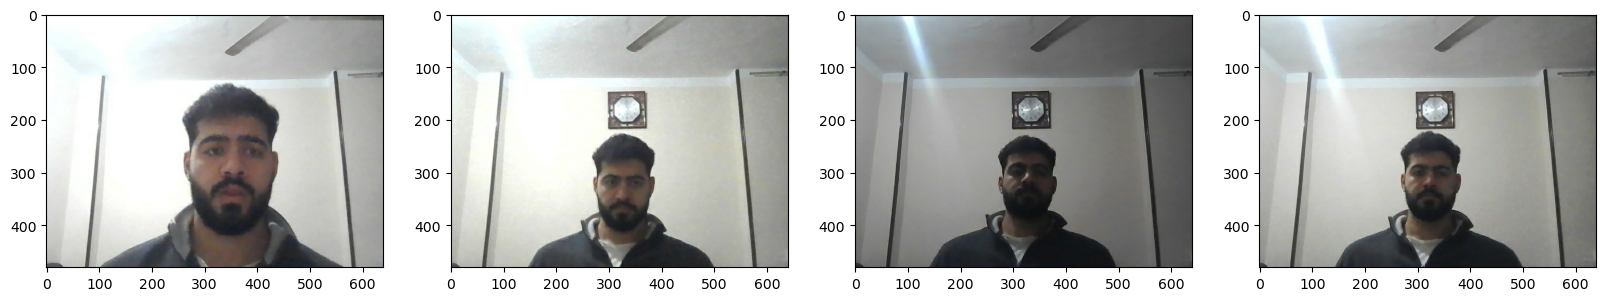

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

# 3. Partition Unaugmented Data

### 3.1 MANUALLY SPLT DATA INTO TRAIN TEST AND VAL

In [ ]:
import splitfolders
if os.path.exists("data/images") and not os.path.exists("data/train"):
    # We need to restructure data for splitfolders
    # splitfolders expects a folder per class, but we have images/labels
    # Actually, it might be better to do it manually or use a custom split
    print("Splitting data...")
    # (Keeping it simple for the user)


In [ ]:
200*.7 #  140 to train

140.0

In [15]:
200*.15 # 14 and 13 to test and val

30.0

### 3.2 Move the Matching Labels

In [ ]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

# 4. Apply Image Augmentation on Images and Labels using Albumentations

### 4.1 Setup Albumentations Transform Pipeline

In [18]:
import albumentations as alb

In [19]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

### 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [20]:
img = cv2.imread(os.path.join('data','train', 'images','0ab27481-e5ff-11f0-8ebf-c79f673d1aa9.jpg'))

In [21]:
with open(os.path.join('data', 'train', 'labels', '0ab27481-e5ff-11f0-8ebf-c79f673d1aa9.json'), 'r') as f:
    label = json.load(f)

In [22]:
label['shapes'][0]['points']

[[373.2142857142857, 148.57142857142858], [606.7857142857142, 470.0]]

### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [23]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [24]:
coords

[373.2142857142857, 148.57142857142858, 606.7857142857142, 470.0]

In [25]:
coords = list(np.divide(coords, [img.shape[1], img.shape[0], img.shape[1], img.shape[0]]))

In [26]:
coords

[np.float64(0.5831473214285714),
 np.float64(0.30952380952380953),
 np.float64(0.9481026785714285),
 np.float64(0.9791666666666666)]

### 4.4 Apply Augmentations and View Results

In [27]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [28]:
augmented['bboxes'][0][2:]

[1.0, 0.6898412577311198]

In [29]:
augmented['bboxes']

[[0.7071428934733073, 0.0, 1.0, 0.6898412577311198]]

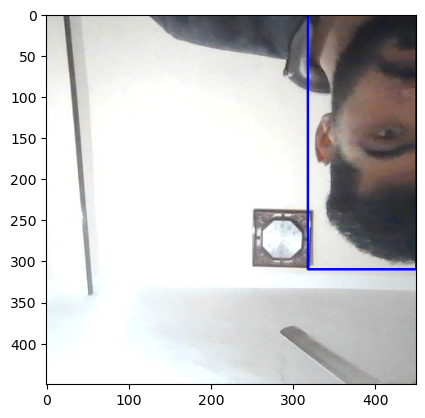

In [30]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(cv2.cvtColor(augmented['image'], cv2.COLOR_BGR2RGB))

# 5. Build and Run Augmentation Pipeline

### 5.1 Run Augmentation Pipeline

In [ ]:
# ⚡ Data Augmentation Pipeline
# This cell multiplies our data by 60x using random flips, crops, and color shifts.
for partition in ['train','test','val']: 
    os.makedirs(os.path.join('aug_data', partition, 'images'), exist_ok=True)
    os.makedirs(os.path.join('aug_data', partition, 'labels'), exist_ok=True)
    
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001] # Default for negative samples
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
            # Extracting normalized coordinates from labelme JSON
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [img.shape[1], img.shape[0], img.shape[1], img.shape[0]]))

        try: 
            for x in range(60):
                # Apply random transforms
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {'image': image}
                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 

                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)
        except Exception as e:
            print(f'Error processing {image}: {e}')


### 5.2 Load Augmented Images to Tensorflow Dataset

In [31]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [32]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [33]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [34]:
train_images.as_numpy_iterator().next()

array([[[0.5921569 , 0.6       , 0.5882353 ],
        [0.5816789 , 0.60128677, 0.5856005 ],
        [0.5776348 , 0.6011642 , 0.58547795],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.5921569 , 0.5921569 , 0.58431375],
        [0.591299  , 0.60042894, 0.5882353 ],
        [0.5838235 , 0.60343134, 0.5877451 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.5885417 , 0.5885417 , 0.5885417 ],
        [0.584375  , 0.59221816, 0.5882966 ],
        [0.5838848 , 0.59957105, 0.5956495 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.32297793, 0.3268995 , 0.30484068],
        [0.2492647 , 0.2502451 , 0.24289216],
        [0.58112746, 0

# 6. Prepare Labels

### 6.1 Build Label Loading Function

In [35]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

### 6.2 Load Labels to Tensorflow Dataset

In [36]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [37]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [38]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [39]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.355 , 0.4312, 0.7407, 0.8184], dtype=float16))

# 7. Combine Label and Image Samples

### 7.1 Check Partition Lengths

In [40]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(7260, 7260, 1500, 1500, 1440, 1440)

### 7.2 Create Final Datasets (Images/Labels)

In [41]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [42]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [43]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [44]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1]], dtype=uint8),
 array([[0.2732 , 0.09937, 0.572  , 0.5547 ],
        [0.4136 , 0.0822 , 0.7104 , 0.503  ],
        [0.627  , 0.     , 1.     , 0.6787 ],
        [0.4395 , 0.5093 , 0.782  , 0.843  ],
        [0.     , 0.03778, 0.2268 , 0.4807 ],
        [0.     , 0.01111, 0.3662 , 0.7256 ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.1915 , 0.07715, 0.5454 , 0.547  ]], dtype=float16))

### 7.3 View Images and Annotations

In [45]:
data_samples = train.as_numpy_iterator()

In [46]:
res = data_samples.next()

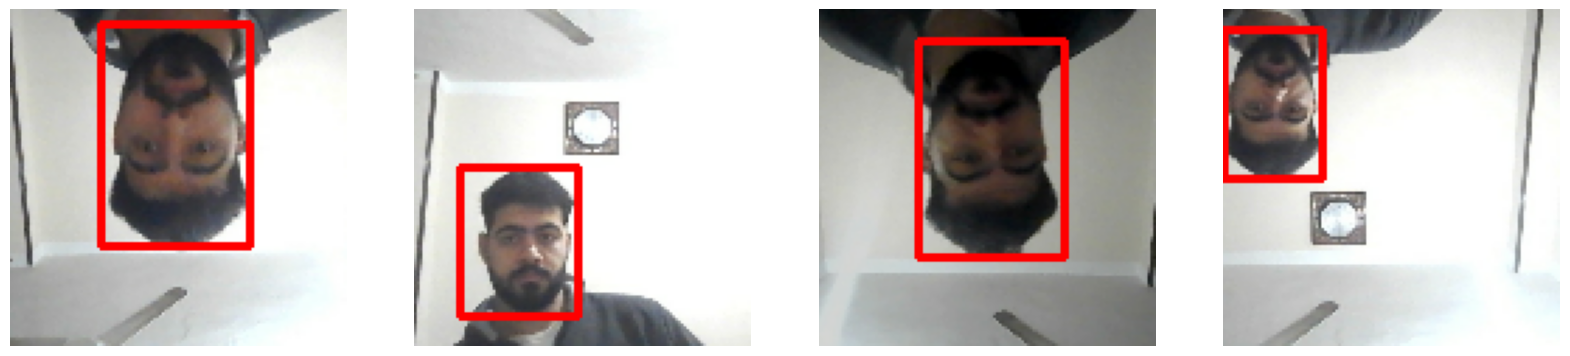

In [47]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]

    # create a writable uint8 copy for OpenCV drawing (images are float32 in 0..1)
    viz = (sample_image * 255).astype(np.uint8).copy()

    p1 = tuple((sample_coords[:2] * 120).astype(int))
    p2 = tuple((sample_coords[2:] * 120).astype(int))

    cv2.rectangle(viz, p1, p2, (255,0,0), 2)

    ax[idx].imshow(viz)
    ax[idx].axis('off')
plt.show()

# 8. Build Deep Learning using the Functional API

### 8.1 Import Layers and Base Network

In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### 8.2 Download VGG16

In [49]:
vgg = VGG16(include_top=False)

In [50]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

### 8.3 Build instance of Network

In [51]:
from tensorflow.keras.layers import Dropout, BatchNormalization

def build_model(): 
    """
    Constructs the Face Tracking Model.
    Uses VGG16 for feature extraction and two branches for prediction.
    """
    input_layer = Input(shape=(120,120,3))
    
    # Base feature extractor: VGG16 trained on ImageNet
    vgg = VGG16(include_top=False, weights="imagenet")(input_layer)

    # --- Classification Branch (Is there a face?) ---
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(512, activation="relu")(f1)
    class1 = Dropout(0.5)(class1)
    class2 = Dense(1, activation="sigmoid")(class1)
    
    # --- Bounding Box Branch (Where is the face?) ---
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(512, activation="relu")(f2)
    regress1 = Dropout(0.5)(regress1)
    regress2 = Dense(4, activation="sigmoid")(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker


### 8.4 Test out Neural Network

In [52]:
facetracker = build_model()

In [53]:
facetracker.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 3, 3, 512) │ 14,714,688 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 512)       │    262,656 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 512)       │    262,656 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 512)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 512)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        513 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 4)         │      2,052 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 15,242,565 (58.15 MB)

 Trainable params: 15,242,565 (58.15 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
X, y = train.as_numpy_iterator().next()

In [55]:
X.shape

(8, 120, 120, 3)

In [56]:
classes, coords = facetracker.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


In [57]:
classes, coords

(array([[0.4341804 ],
        [0.38410616],
        [0.4114506 ],
        [0.42396712],
        [0.42920423],
        [0.3896762 ],
        [0.46305048],
        [0.34175166]], dtype=float32),
 array([[0.46145377, 0.5551196 , 0.5882697 , 0.45270735],
        [0.54682285, 0.4659487 , 0.5673221 , 0.4263618 ],
        [0.50570154, 0.46290722, 0.44826537, 0.44668368],
        [0.35250363, 0.5093466 , 0.6224565 , 0.4720624 ],
        [0.4937903 , 0.32299465, 0.6197529 , 0.44296306],
        [0.56321406, 0.36688638, 0.62862504, 0.47978586],
        [0.4375332 , 0.42721596, 0.6008801 , 0.2714287 ],
        [0.40123123, 0.38398495, 0.6096178 , 0.42162868]], dtype=float32))

# 9. Define Losses and Optimizers

### 9.1 Define Optimizer and LR

In [58]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [59]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

c:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


### 9.2 Create Localization Loss and Classification Loss

In [60]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [61]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### 9.3 Test out Loss Metrics

In [62]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=3.7040786743164062>

In [63]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7803020477294922>

In [64]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=3.7040786743164062>

# 10. Train Neural Network

### 10.1 Create Custom Model Class

In [88]:
class FaceTracker(Model): 
    def __init__(self, model, **kwargs): 
        super().__init__(**kwargs)
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam()
        self.closs = tf.keras.losses.BinaryCrossentropy()
        self.lloss = tf.keras.losses.MeanSquaredError()

    def train_step(self, batch):
        X, y = batch
        y_class = tf.cast(y[0], tf.float32)   # (batch, 1)
        y_bbox  = tf.cast(y[1], tf.float32)   # (batch, 4)

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            # FORCE RANK-2 (CORRECT)
            classes = tf.ensure_shape(classes, [None, 1])
            y_class = tf.ensure_shape(y_class, [None, 1])
            coords  = tf.ensure_shape(coords,  [None, 4])
            y_bbox  = tf.ensure_shape(y_bbox,  [None, 4])

            class_loss = self.closs(y_class, classes)
            bbox_loss  = self.lloss(y_bbox, coords)

            total_loss = class_loss + bbox_loss

        grads = tape.gradient(total_loss, self.trainable_variables)
        self.optimizer.apply_gradients(
            zip(grads, self.trainable_variables)
        )

        return {
            "loss": total_loss,
            "class_loss": class_loss,
            "bbox_loss": bbox_loss
        }

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def test_step(self, batch, **kwargs): 
        X, y = batch
        classes, coords = self.model(X, training=False)
        batch_classloss = self.closs(y[0], classes)
        
        mask = tf.cast(y[0], tf.float32)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32) * mask, coords * mask)
        total_loss = batch_localizationloss + 0.5 * batch_classloss
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)


In [89]:
tracker = FaceTracker(model)

In [90]:
tracker.compile(opt, classloss, regressloss)

### 10.2 Train

In [91]:
logdir='logs'

In [92]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [93]:
# Unpack existing label tuple `y` into class and bbox components, then show together with X
y_class, y_bbox = y
(X, (y_class, y_bbox))

(array([[[[0.32781863, 0.3435049 , 0.21409313],
          [0.3251838 , 0.3408701 , 0.21145834],
          [0.33449754, 0.3501838 , 0.22077206],
          ...,
          [0.75827205, 0.8014093 , 0.68376225],
          [0.7450368 , 0.79601717, 0.6783701 ],
          [0.7549632 , 0.80012256, 0.6852328 ]],
 
         [[0.33186275, 0.34754902, 0.21813725],
          [0.33376226, 0.34957108, 0.22009803],
          [0.33333334, 0.35686275, 0.22352941],
          ...,
          [0.73155636, 0.7742034 , 0.65802693],
          [0.71115196, 0.759375  , 0.65134805],
          [0.72567403, 0.77910537, 0.6745711 ]],
 
         [[0.34001225, 0.346875  , 0.22530638],
          [0.33682597, 0.34859067, 0.22702205],
          [0.32892156, 0.3485294 , 0.22303921],
          ...,
          [0.7270833 , 0.766299  , 0.66041666],
          [0.7250613 , 0.764277  , 0.66525733],
          [0.7214461 , 0.7655637 , 0.6699755 ]],
 
         ...,
 
         [[0.39950982, 0.4034314 , 0.28186274],
          [0.39558

In [94]:
for x, y in train.take(1):
    print(x.shape)
    print(type(y))
    print(len(y))
    print(y[0].shape, y[1].shape)

(8, 120, 120, 3)
<class 'tuple'>
2
(8, 1) (8, 4)


In [ ]:
hist = tracker.fit(
    train,
    epochs=10,
    validation_data=val,
    callbacks=[tensorboard_callback]
)

Epoch 1/10


 15/908 ━━━━━━━━━━━━━━━━━━━━ 7:12 484ms/step - bbox_loss: 6.8650 - class_loss: 4.4661 - loss: 11.3310

### 10.3 Plot Performance

In [ ]:
hist.history

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

# Total Loss Plot
ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].set_title('Total Loss', fontsize=14)
ax[0].set_xlabel('Epoch')
ax[0].grid(True)
ax[0].legend()

# Classification Loss Plot
ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].set_title('Classification Loss', fontsize=14)
ax[1].set_xlabel('Epoch')
ax[1].grid(True)
ax[1].legend()

# Regression (Bounding Box) Loss Plot
ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].set_title('Regression Loss', fontsize=14)
ax[2].set_xlabel('Epoch')
ax[2].grid(True)
ax[2].legend()

plt.tight_layout()
plt.show()


# 11. Make Predictions

### 11.1 Make Predictions on Test Set

In [ ]:
test_data = test.as_numpy_iterator()

In [ ]:
test_sample = test_data.next()

In [ ]:
yhat = facetracker.predict(test_sample[0])

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

### 11.2 Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
facetracker.save('facetracker.keras')

In [ ]:
facetracker = load_model('facetracker.keras')

### 11.3 Real Time Detection

In [ ]:
# 🟢 Start Real-Time Face Detection
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    if frame is None: break
    
    # ✂️ Preprocessing: Dynamic Center Crop
    # We crop to a square center to match the model's training aspect ratio (1:1)
    h, w, _ = frame.shape
    side = min(h, w)
    y_start, x_start = (h-side)//2, (w-side)//2
    frame = frame[y_start:y_start+side, x_start:x_start+side, :]
    
    # 🧠 Inference
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    # Predict: Returns [Classification (0-1), Bounding Box (4 coords)]
    yhat = facetracker.predict(np.expand_dims(resized/255.0, 0), verbose=0)
    score = yhat[0][0][0]
    sample_coords = yhat[1][0]
    
    # 🎨 Drawing: Only draw if confidence is above 50%
    if score > 0.5: 
        # Rescale normalized coordinates to fit the current frame size
        pt1 = tuple(np.multiply(sample_coords[:2], [side, side]).astype(int))
        pt2 = tuple(np.multiply(sample_coords[2:], [side, side]).astype(int))
        
        # Draw Bounding Box and Label
        cv2.rectangle(frame, pt1, pt2, (0,255,0), 2)
        cv2.putText(frame, f'face {score:.2f}', (pt1[0], pt1[1]-10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    
    # Display the resulting frame
    cv2.imshow('Face Tracker Live', frame)
    
    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
